# Collecting Tweets

This notebook shows how to collect tweets. For analyzing words you want to collect by search term, but collecting tweets from a specific user is also possible.

In [1]:
import sys
sys.path.append('..')

from twords.twords import Twords 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
# this pandas line makes the dataframe display all text in a line; useful for seeing entire tweets
pd.set_option('display.max_colwidth', -1)

In [2]:
twit_mars = Twords()
# set path to folder that contains jar files for twitter search
twit_mars.jar_folder_path = "../jar_files_and_background/"

## Collect Tweets by search term

### Function: create_java_tweets

This function collects tweets and puts them into a single folder in the form needed to read them into a Twords object using get_java_tweets_from_csv_list.

For more information of create_java_tweets arguments see source code in twords.py file

**total_num_tweets**: (int) total number of tweets to collect

**tweets_per_run**: (int) number of tweets per call to java tweet collector; from experience best to keep around 10,000 for large runs (for runs less than 10,000 can just set tweets_per_run to same value as total_num_tweets)

**querysearch**: (string) search query - for example, "charisma" or "mars rover"; a space between words implies an "and" operator between them: only tweets with both terms will be returned

**final_until**: (string) the date to search backward in time from; has form '2015-07-31'; for example, if date is '2015-07-31', then tweets are collected backward in time from that date. If left as None, uses current date to search backward from

**output_folder**: (string) name of folder to put output files in

**decay_factor**: (int) how quickly to wind down tweet search if errors occur and no tweets are found in a run - a failed run will count as tweets_per_run/decay_factor tweets found, so the higher the factor the longer the program will try to search for tweets even if it gathers none in a run

**all_tweets**: (bool) whether to return "all tweets" (as defined on twitter website) or "top tweets"; the details behind these designations are mysteries only Twitter knows, but from experiment on website "top tweets" appear to be subset of "all tweets" that Twitter considers interesting; there is no guarantee that this will return literally every tweet, and experiment suggests even "all tweets" does not return every single tweet that given search query may match

Try collecting tweets about the mars rover:

In [3]:
twit_mars.create_java_tweets(total_num_tweets=100, tweets_per_run=50, querysearch="mars rover",
                           final_until=None, output_folder="mars_rover",
                           decay_factor=4, all_tweets=True)

Expecting 2 total runs
Time to collect 50 tweets: 0.0 minutes
Time to collect 50 tweets: 0.0 minutes
Total time to collect 100 tweets: 0.1 minutes


In [4]:
twit_mars.get_java_tweets_from_csv_list()

In [5]:
twit_mars.tweets_df.head(5)

,username,date,retweets,favorites,text,mentions,hashtags,id,permalink
0,mediatorem2017,2017/03/20,0,0,@lmschultz5 @anataliedz1 If it does miracualously someone will have a new invention. Mars rover battery?,@lmschultz5 @anataliedz1,NaN,843973662944452608,https://twitter.com/mediatorem2017/status/843973662944452608
1,DrMarsRover,2017/03/20,0,1,@TheFeelofFilm Woohoo! Nice for mom ;-),@TheFeelofFilm,NaN,843961027620290560,https://twitter.com/DrMarsRover/status/843961027620290560
2,dancetronauts,2017/03/20,2,1,@dancetronauts reporting in at @nasajpl alongside the mars_rover_curiosity marscuriositynasa… https://www.instagram.com/p/BR4KEmQhF0j/,@dancetronauts @nasajpl,NaN,843959222857482240,https://twitter.com/dancetronauts/status/843959222857482240
3,Elusieum,2017/03/20,0,4,"2020: busy year for Mars, with a planned Chinese Mars Rover, SpaceX Dragon landing, UAE HOPE mission, in addition to @NASA plans #LPSC2017",@NASA,#LPSC2017,843957308996698112,https://twitter.com/Elusieum/status/843957308996698112
4,QuantumDoc,2017/03/20,0,0,FOOTPRINT AND ODDITIES FILMED ON MARS BY MARS ROVER - A COLLECTION - UFO MAN https://lnkd.in/gSpbjm5,NaN,NaN,843956182326829056,https://twitter.com/QuantumDoc/status/843956182326829056


## Collect Tweets from user

### Function: get_all_user_tweets

This function collects all user tweets that are available from twitter website by scrolling. As an example, a run of this function collected about 87% of the tweets from user barackobama.

To avoid problems with scrolling on the website (which is what the java tweet collector programmatically does), best if tweets_per_run is set to be around 500. 

This function may sometimes return multiple copies of the same tweet, which can be removed in the resulting pandas dataframe once the data is read into Twords.

**user**: (string) twitter handle of user to gather tweets from

**tweets_per_run** (int) number of tweets to collect in a single call to java tweet collector; some experimentation is required to see which number ends up dropping the fewest tweets - 500 seems to be a decent value

In [6]:
twit = Twords()
twit.jar_folder_path = "../jar_files_and_background/"
twit.get_all_user_tweets("barackobama", tweets_per_run=500)

Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.0 minutes
Tweets timeline incremented by only one day - may need larger tweets_per_run, or could just be regular stutter in querying timeline.
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.0 minutes
Tweets timeline incremented by only one day - may need larger tweets_per_run, or could just be regular stutter in querying timeline.
Time to collec

In [7]:
twit.get_java_tweets_from_csv_list()
twit.convert_tweet_dates_to_standard()

If you want to sort the tweets by retweets or favorites, you'll need to convert the retweets and favorites columns from unicode into integers: 

In [8]:
twit.tweets_df["retweets"] = twit.tweets_df["retweets"].map(int)
twit.tweets_df["favorites"] = twit.tweets_df["favorites"].map(int)

In [9]:
twit.tweets_df.sort_values("favorites", ascending=False)[:5]

,username,date,retweets,favorites,text,mentions,hashtags,id,permalink
13035,BarackObama,2017-01-20,447376,1888816,"Hi everybody! Back to the original handle. Is this thing still on? Michelle and I are off on a quick vacation, then we’ll get back to work.",NaN,NaN,822550300942856193,https://twitter.com/BarackObama/status/822550300942856193
13032,BarackObama,2017-02-14,257761,1082188,"Happy Valentine’s Day, @michelleobama! Almost 28 years with you, but it always feels new.pic.twitter.com/O0UhJWoqGN",@michelleobama,NaN,831527113211645959,https://twitter.com/BarackObama/status/831527113211645959
3283,BarackObama,2012-11-06,942962,625376,Four more years.pic.twitter.com/bAJE6Vom,NaN,NaN,266031293945503744,https://twitter.com/BarackObama/status/266031293945503744
13028,BarackObama,2017-03-19,63027,350785,"Chuck Berry rolled over everyone who came before him – and turned up everyone who came after. We'll miss you, Chuck. Be good.",NaN,NaN,843490091519623169,https://twitter.com/BarackObama/status/843490091519623169
13127,BarackObama,2016-10-03,125367,315809,Side-by-side for 24 years. Here's to many more. #HappyAnniversarypic.twitter.com/nh8Xfc7IWU,NaN,#HappyAnniversarypic,783009809356304385,https://twitter.com/BarackObama/status/783009809356304385


In [10]:
twit.tweets_df.sort_values("favorites", ascending=False)[:5]

,username,date,retweets,favorites,text,mentions,hashtags,id,permalink
13035,BarackObama,2017-01-20,447376,1888816,"Hi everybody! Back to the original handle. Is this thing still on? Michelle and I are off on a quick vacation, then we’ll get back to work.",NaN,NaN,822550300942856193,https://twitter.com/BarackObama/status/822550300942856193
13032,BarackObama,2017-02-14,257761,1082188,"Happy Valentine’s Day, @michelleobama! Almost 28 years with you, but it always feels new.pic.twitter.com/O0UhJWoqGN",@michelleobama,NaN,831527113211645959,https://twitter.com/BarackObama/status/831527113211645959
3283,BarackObama,2012-11-06,942962,625376,Four more years.pic.twitter.com/bAJE6Vom,NaN,NaN,266031293945503744,https://twitter.com/BarackObama/status/266031293945503744
13028,BarackObama,2017-03-19,63027,350785,"Chuck Berry rolled over everyone who came before him – and turned up everyone who came after. We'll miss you, Chuck. Be good.",NaN,NaN,843490091519623169,https://twitter.com/BarackObama/status/843490091519623169
13127,BarackObama,2016-10-03,125367,315809,Side-by-side for 24 years. Here's to many more. #HappyAnniversarypic.twitter.com/nh8Xfc7IWU,NaN,#HappyAnniversarypic,783009809356304385,https://twitter.com/BarackObama/status/783009809356304385


## For fun: A look at Barack Obama's tweets

The Twords word frequency analysis can also be applied to these tweets. In this case there was no search term. 

In [11]:
twit.background_path = '../jar_files_and_background/freq_table_72319443_total_words_twitter_corpus.csv'
twit.create_Background_dict()
twit.create_Stop_words()

In [12]:
twit.lower_tweets()
twit.keep_only_unicode_tweet_text()
twit.remove_urls_from_tweets()
twit.convert_tweet_dates_to_standard()
twit.sort_tweets_by_date()
twit.drop_duplicates_in_text()

Removing urls from tweets...
This may take a minute - cleaning rate is about 400,000 tweets per minute
Time to complete: 0.033 minutes
Tweets cleaned per minute: 416081.0


Make word frequency dataframe: 

In [13]:
twit.create_word_bag()
twit.make_nltk_object_from_word_bag()
twit.create_word_freq_df(1000)

Time to make words_string:  0.0 minutes
Time to tokenize:  0.067 minutes
Time to compute word bag:  0.021 minutes
Creating word_freq_df...
Takes about 1 minute per 1000 words
Time to create word_freq_df:  0.3716 minutes


In [14]:
twit.word_freq_df.sort_values("log relative frequency", ascending = False, inplace = True)
twit.word_freq_df.head(20)

,word,occurrences,frequency,relative frequency,log relative frequency,background_occur
98,sotu,187,0.001431,9405.284171,9.149027,11
31,ofa,380,0.002907,5532.520101,8.618399,38
43,actonclimate,311,0.002379,3308.872599,8.104363,52
119,middle-class,161,0.001232,2024.399400,7.613028,44
450,uninsured,54,0.000413,1991.707236,7.596747,15
674,pre-existing,34,0.000260,1567.547362,7.357267,12
752,ledbetter,30,0.000230,1276.735408,7.152062,13
987,speakerboehner,22,0.000168,1106.504020,7.008961,11
722,equalpay,31,0.000237,1071.925770,6.977212,16
268,doyourjob,85,0.000650,825.024927,6.715414,57


In [15]:
twit.tweets_containing("sotu")[:10]

229 tweets contain this term


,username,text
518,barackobama,"all of our men and women in uniform around the world must know that they have our respect, our gratitude, and our full support."" #sotu"""
519,barackobama,"i will not walk away from the millions of americans who need health care, and neither should the people in this chamber."" #sotu"""
520,barackobama,"in the 21st century, one of the best anti-poverty programs is a world-class education."" #sotu"""
521,barackobama,"the nation that leads the clean energy economy will be the nation that leads the global economy. and america must be that nation."" #sotu"""
522,barackobama,"we can’t allow financial institutions, including those that take your deposits, to take risks that threaten the whole economy."" #sotu"""
523,barackobama,"people are out of work. they are hurting. they need our help. and i want a jobs bill on my desk without delay."" #sotu"""
526,barackobama,"it is because of the spirit and resilience of americans that i have never been more hopeful about america’s future than i am tonight"" #sotu"""
527,barackobama,"america prevailed because we chose to move forward as one nation. again, we are tested. and again we must answer history’s call."" #sotu"""
528,barackobama,ofa staff will be tweeting highlights from tonight's #sotu address. watch live at 9pm et:
531,barackobama,"because of the recovery act, there are about two million americans working right now who would otherwise be unemployed."" #sotu"""


Now plot relative frequency results. We see from word_freq_df that the largest relative frequency terms are specialized things like "sotu" (state of the union) and specific policy-related words like "middle-class." We'll increase the requirement on background words to remove these policy-specific words and get at more general words that the president's twitter account nevertheless uses more often than usual: 

#### At least 100 background occurrences:

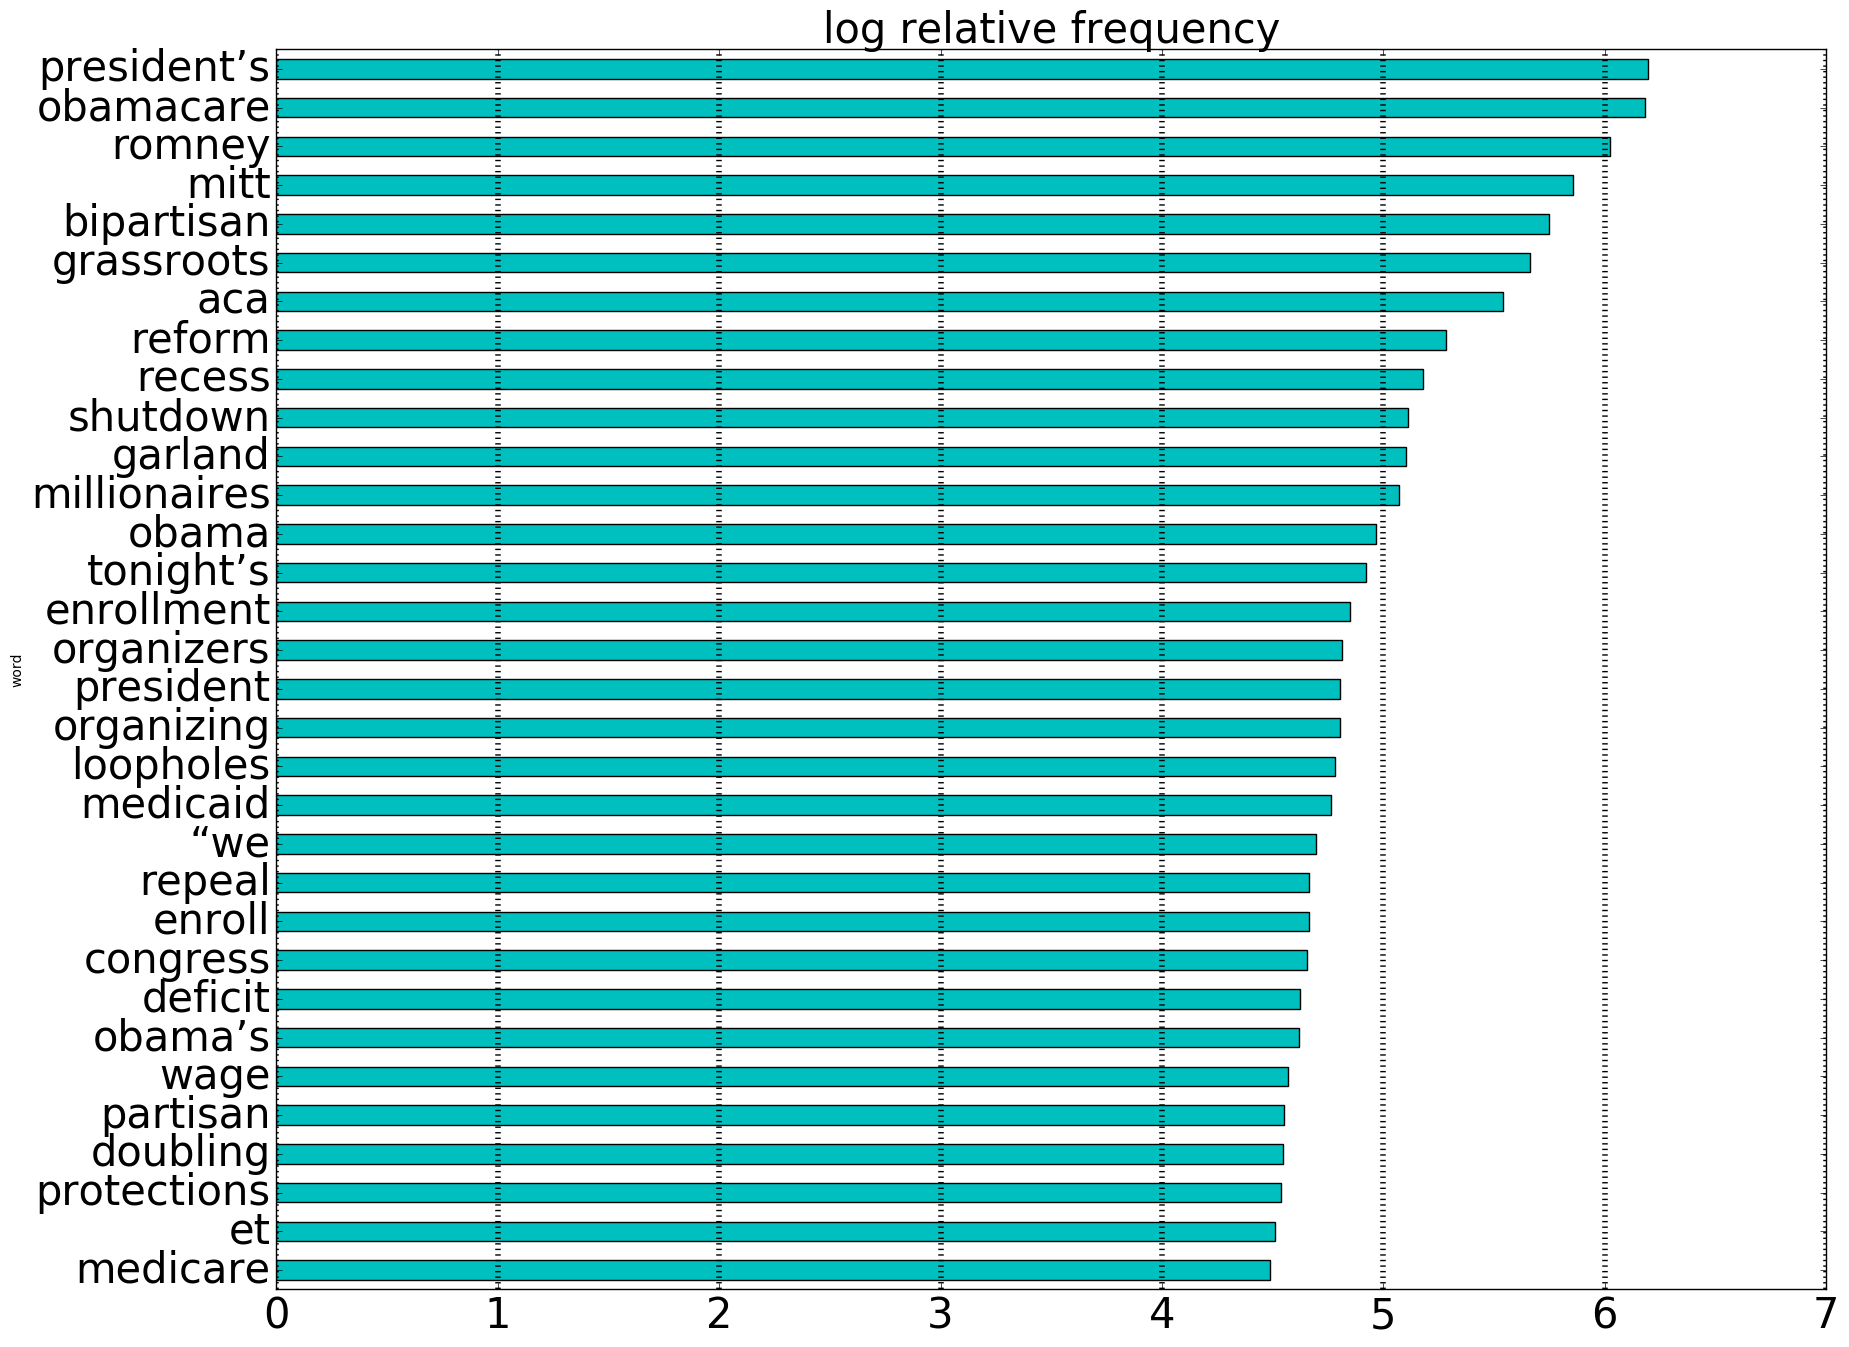

In [16]:
num_words_to_plot = 32
background_cutoff = 100
twit.word_freq_df[twit.word_freq_df["background_occur"]>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

#### At least 1000 background occurrences:

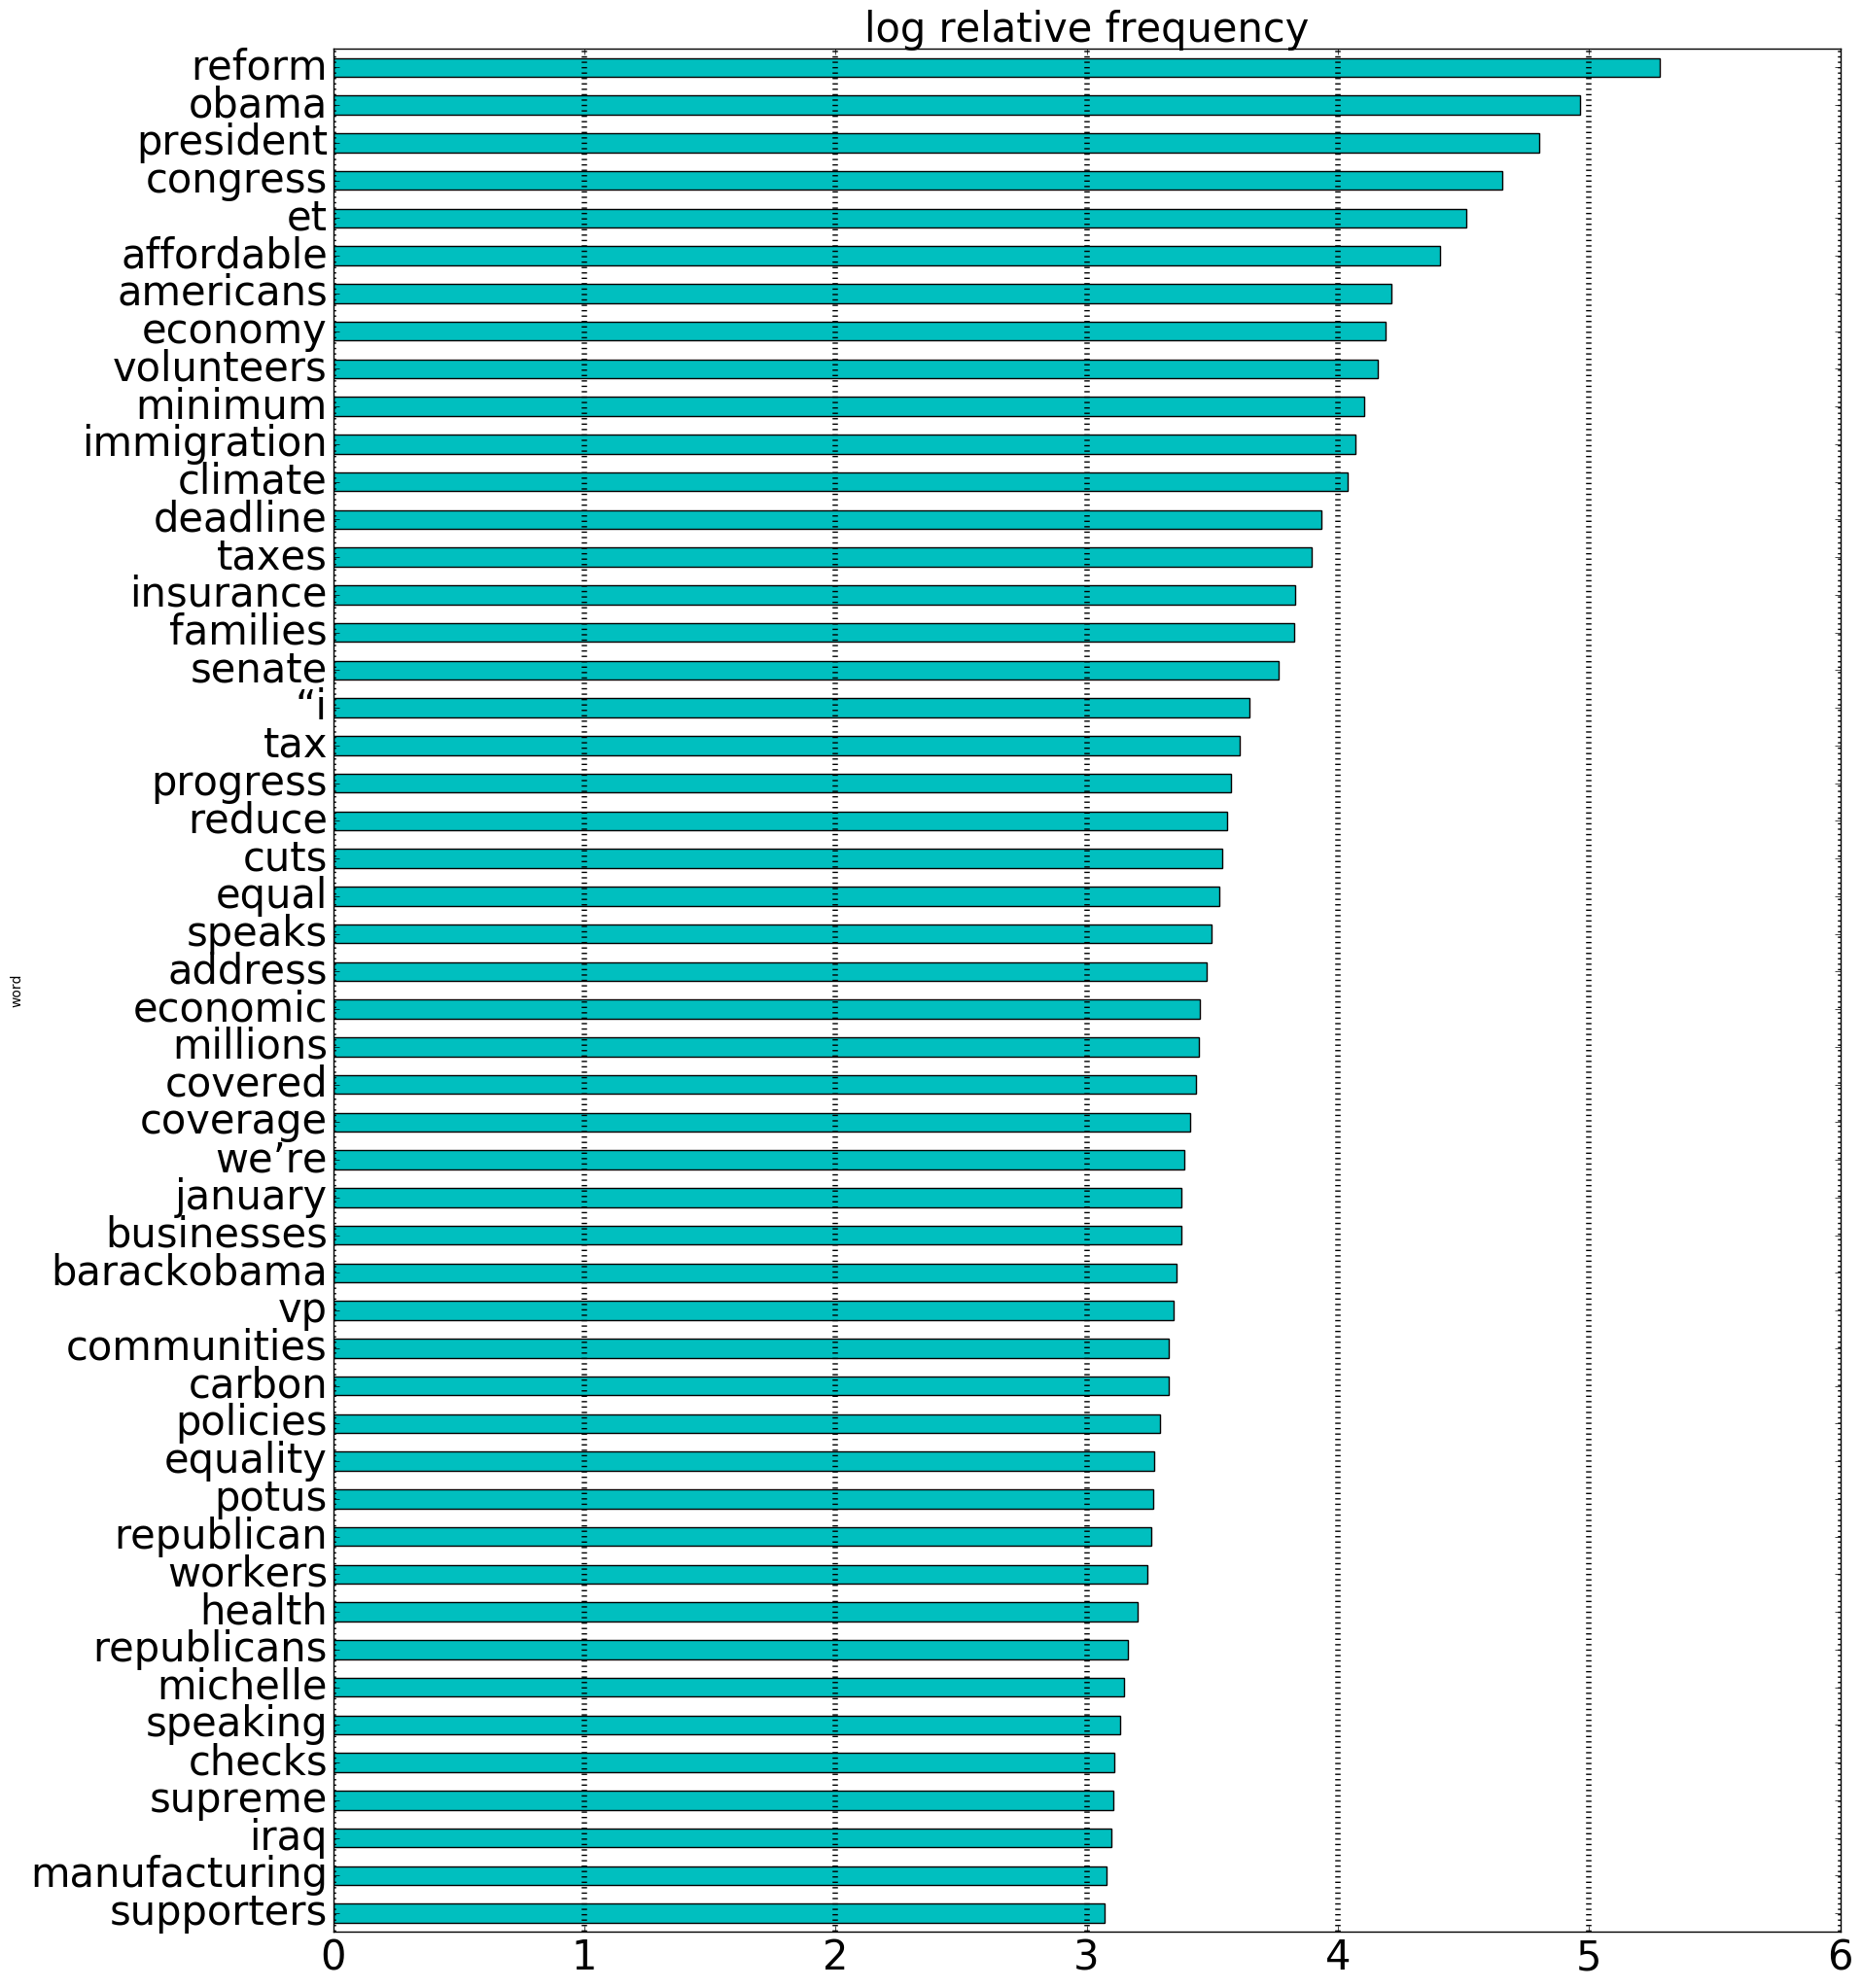

In [17]:
num_words_to_plot = 50
background_cutoff = 1000
twit.word_freq_df[twit.word_freq_df["background_occur"]>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

The month of January appears to carry special import with the president's twitter account.

#### At least 5000 background occurrences:

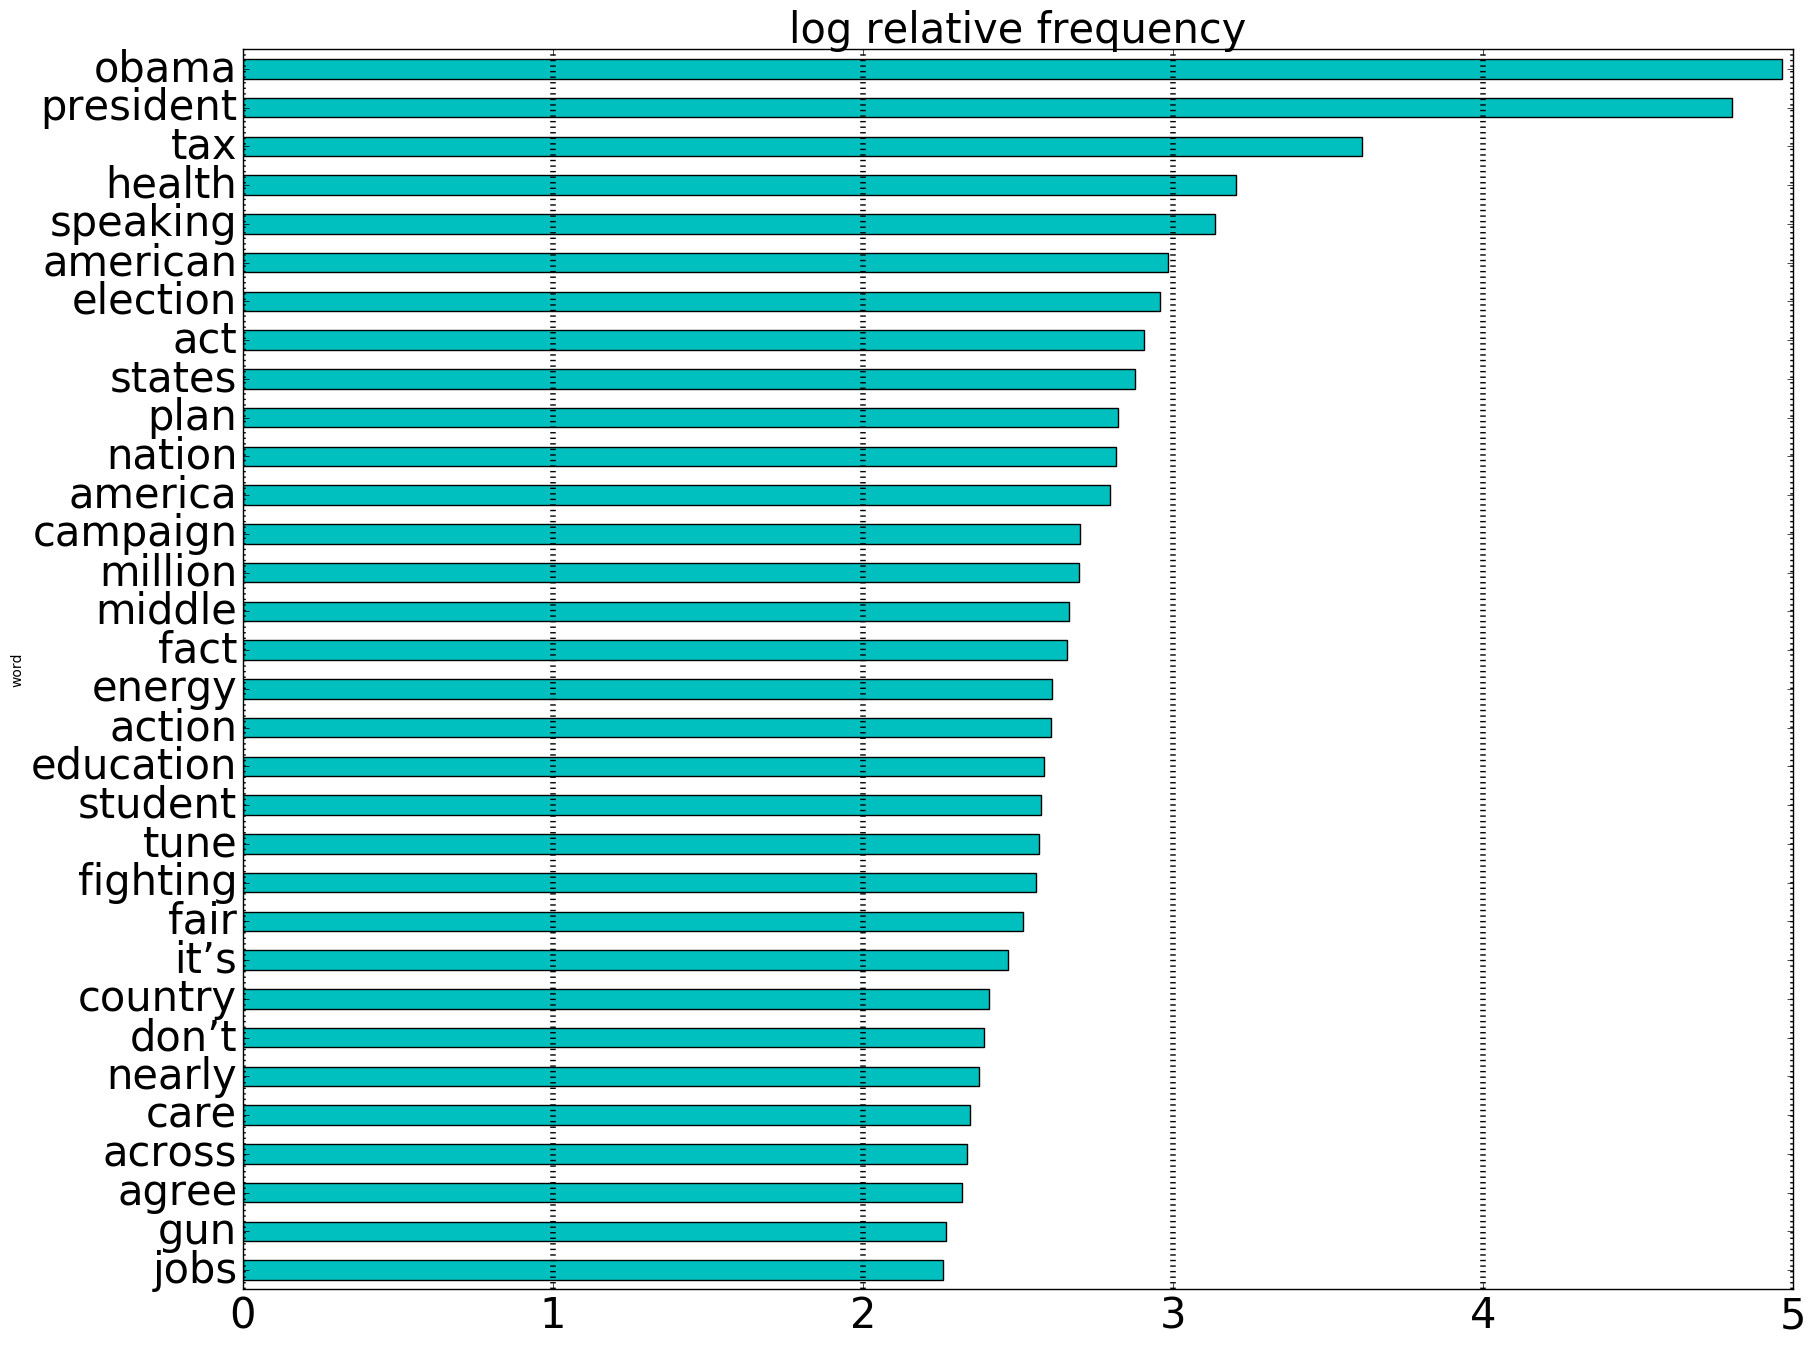

In [18]:
num_words_to_plot = 32
background_cutoff = 5000
twit.word_freq_df[twit.word_freq_df["background_occur"]>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);